In [1]:
import zntrack
import numpy as np

In [3]:
mmk = zntrack.from_rev("bootstrap_ConfigurationSelection")

2023-11-03 19:18:11,609 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


In [4]:
mmk.plot_kernel()

In [94]:
kernel = np.array(mmk.kernel_results)

In [95]:
kernel.shape

(30, 201)

In [96]:
hist = np.histogram(kernel[0], bins=kernel.shape[1] // 10)
print(hist)

len(hist[1])

(array([ 3,  0,  1,  2,  1,  3,  1,  0, 29, 54, 48,  6,  5, 10,  2,  4,  7,
        4,  6, 15]), array([0.87112892, 0.87757244, 0.88401595, 0.89045947, 0.89690299,
       0.90334651, 0.90979003, 0.91623355, 0.92267706, 0.92912058,
       0.9355641 , 0.94200762, 0.94845114, 0.95489466, 0.96133817,
       0.96778169, 0.97422521, 0.98066873, 0.98711225, 0.99355577,
       0.99999928]))


21

zero
zero
zero
zero
zero
[ 1.25661952  0.0657132  -0.25145831]


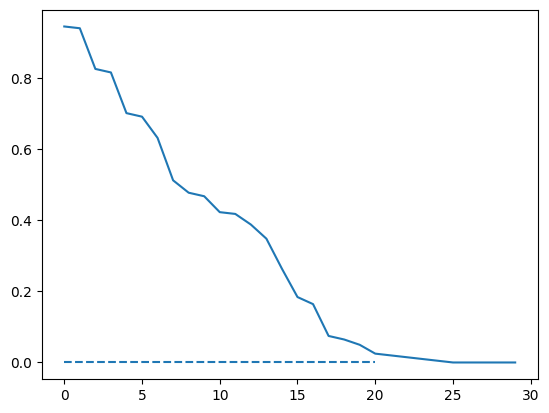

In [112]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


hist = np.histogram(kernel[0], bins=kernel.shape[1] // 10)

threshold = 0.997

# integrate over the histogram up to the 95th percentile
percentages = []
for data in kernel:
    hist, bins = np.histogram(data, bins=np.linspace(0, 1, 10000), density=True)
    bins = bins[:-1]

    # # remove all values above the threshold
    hist[bins > threshold] = 0

    percentages.append(np.trapz(hist, bins))
    if percentages[-1] == 0:
        print("zero")

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(exponential_decay, np.arange(len(percentages)), percentages)

print(popt)

fig, ax = plt.subplots()
ax.plot(percentages)
# ax.plot(exponential_decay(np.arange(30), *popt))
ax.hlines(0, 0, 20, linestyles="dashed")


# np.trapz(hist[0][:19], hist[1][:19])

# fig, ax = plt.subplots()
# ax.plot(hist[1][:-1], hist[0])
# ax.set_xlabel("Kernel value")
# ax.set_ylabel("Count")

In [31]:
hist

(array([ 3,  1,  1,  2,  6,  1, 11, 12, 14, 30,  3, 17, 11,  8,  8,  8, 10,
         7,  8, 40]),
 array([0.88725019, 0.8928703 , 0.89849041, 0.90411052, 0.90973063,
        0.91535074, 0.92097085, 0.92659096, 0.93221107, 0.93783118,
        0.94345129, 0.9490714 , 0.95469151, 0.96031162, 0.96593173,
        0.97155184, 0.97717195, 0.98279206, 0.98841217, 0.99403228,
        0.99965239]))

In [2]:
# Plot for the MMK v. other methods

In [13]:
import zntrack
import matplotlib.pyplot as plt
import numpy as np

In [8]:
mmk_w_threshold = ["soppy-view", "dosed-drop", "aging-sook", "first-hems"]
uniform_time = ["eerie-afro", "quack-chay", "humid-leaf"]
random = ["often-tyke", "spent-main", "fried-milo", "sport-sida"]
mmk_fixed = ["moral-bond", "puffy-tors", "tinct-lamb", "calmy-joey"]

In [9]:
mmk_w_threshold_nodes = [zntrack.from_rev("ML0_PredictionMetrics", rev=x) for x in mmk_w_threshold]
uniform_time_nodes = [zntrack.from_rev("ML0_PredictionMetrics", rev=x) for x in uniform_time]
random_nodes = [zntrack.from_rev("ML0_PredictionMetrics", rev=x) for x in random]
mmk_fixed_nodes = [zntrack.from_rev("ML0_PredictionMetrics", rev=x) for x in mmk_fixed]

In [24]:
def calculate_metrics(nodes):
    metrics = {"energy": [], "forces": []}
    for node in nodes:
        metrics["energy"].append(node.energy)
        metrics["forces"].append(node.forces)

    metrics_mean = {"energy": {}, "forces": {}}
    metrics_std = {"energy": {}, "forces": {}}

    for key in metrics:
        for metric in metrics[key][0]:
            metrics_mean[key][metric] = np.mean([x[metric] for x in metrics[key]])
            metrics_std[key][metric] = np.std([x[metric] for x in metrics[key]])

    return metrics_mean, metrics_std

mmk_w_threshold_metrics_mean, mmk_w_threshold_metrics_std = calculate_metrics(mmk_w_threshold_nodes)
uniform_time_metrics_mean, uniform_time_metrics_std = calculate_metrics(uniform_time_nodes)
random_metrics_mean, random_metrics_std = calculate_metrics(random_nodes)
mmk_fixed_metrics_mean, mmk_fixed_metrics_std = calculate_metrics(mmk_fixed_nodes)

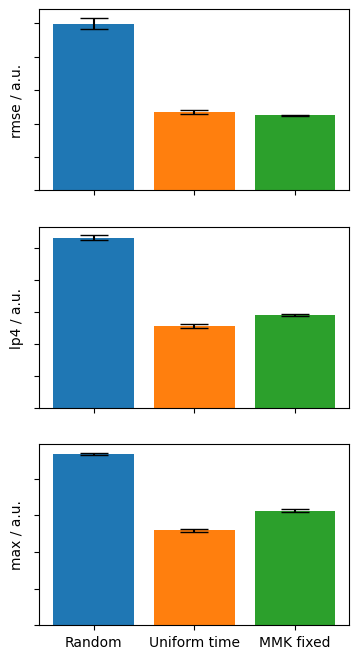

In [64]:
fig, axes = plt.subplots(3, figsize=(4, 8))

key_1 = "forces"
key2_2 = ["rmse", "lp4", "max"]

for ax, key_2 in zip(axes, key2_2):
    ax.bar(1, random_metrics_mean[key_1][key_2], yerr=random_metrics_std[key_1][key_2], label="Random", capsize=10)
    ax.bar(2, uniform_time_metrics_mean[key_1][key_2], yerr=uniform_time_metrics_std[key_1][key_2], label="Uniform time", capsize=10)
    ax.bar(3, mmk_fixed_metrics_mean[key_1][key_2], yerr=mmk_fixed_metrics_std[key_1][key_2], label="MMK fixed", capsize=10)

    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels([])
    ax.set_ylabel(f"{key_2} / a.u.")
    ax.set_yticklabels([])

axes[-1].set_xticklabels(["Random", "Uniform time", "MMK fixed"])
fig.savefig("geopt_sel_forces.png", dpi=600, bbox_inches="tight")